# SDSS filters

http://www.astroml.org/examples/datasets/plot_sdss_filters.html

In [1]:
%matplotlib inline

## Original plot

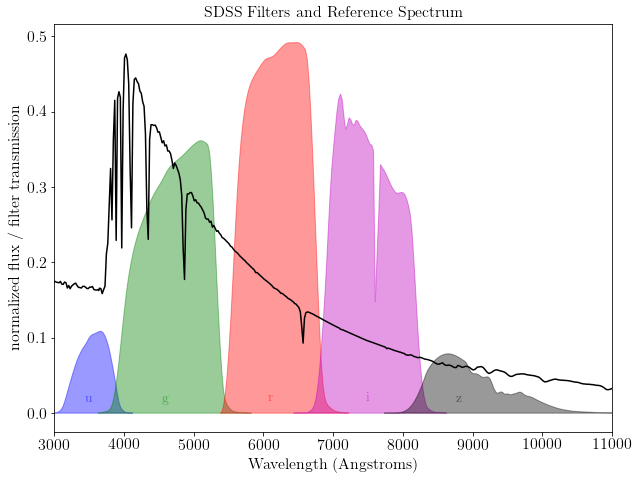

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)
setup_text_plots(fontsize=16, usetex=True)

#------------------------------------------------------------
# Set up figure and axes
# fig = plt.figure(figsize=(5, 3.75))
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111)

#----------------------------------------------------------------------
# Fetch and plot the Vega spectrum
spec = fetch_vega_spectrum()
lam = spec[0]
spectrum = spec[1] / 2.1 / spec[1].max()
ax.plot(lam, spectrum, '-k')

#------------------------------------------------------------
# Fetch and plot the five filters
text_kwargs = dict(ha='center', va='center', alpha=0.5, fontsize=14)

for f, c, loc in zip('ugriz', 'bgrmk', [3500, 4600, 6100, 7500, 8800]):
    data = fetch_sdss_filter(f)
    ax.fill(data[0], data[1], ec=c, fc=c, alpha=0.4)
    ax.text(loc, 0.02, f, color=c, **text_kwargs)

ax.set_xlim(3000, 11000)

ax.set_title('SDSS Filters and Reference Spectrum')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('normalized flux / filter transmission')

## Altair version

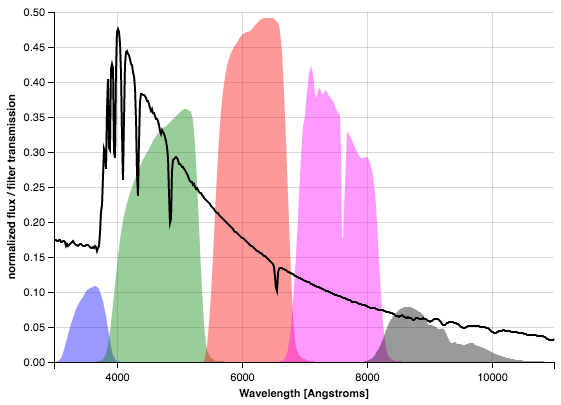

In [3]:
import numpy as np
import pandas as pd
from astroML.datasets import fetch_sdss_filter, fetch_vega_spectrum

from altair import Chart, LayeredChart, Color, Scale, Y, X, Axis

#------------------------------------------
# Set up a DataFrame with the data
#
# Since all transmission curves and the spectrum have different 
# wavelength sampling and number of points, interpolation is needed.

fdict = {}
wavelength = np.linspace(3000, 11000, 500)
fdict['wavelength'] = wavelength
for filt in 'ugriz':
    fdata = fetch_sdss_filter(filt)
    fdict[filt] = np.interp(wavelength, fdata[0], fdata[1])

# Fetch the Vega spectrum, scale and interpolate it 
spec = fetch_vega_spectrum()
spectrum = spec[1] / 2.1 / spec[1].max()
fdict['spectrum'] = np.interp(wavelength, spec[0], spectrum)

# Create the DataFrame from the dictionnary
data = pd.DataFrame(fdict)

#------------------------------------------
# Set up a LayeredChart to plot the data

chart = LayeredChart(data)
        
# Plot the filters
filter_colors = ['blue', 'green', 'red', 'magenta', 'black']

for filt, color in zip('ugriz', filter_colors):
    chart += Chart().mark_area(color=color, opacity=0.4).encode(
        X('wavelength', scale=Scale(zero=False), axis=Axis(title='Wavelength [Angstroms]', format='f')), 
        Y('%s:Q' % filt, axis=Axis(title='normalized flux / filter transmission', format='f')))

# Plot the Vega spectrum on top of it
# The axis properties are conserved so there is no need to write them twice
chart += Chart().mark_line(color='black').encode(x='wavelength', y='spectrum:Q')
        
chart.display()